# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

from tqdm import tqdm
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px

# Data Load

In [2]:
data = pd.read_csv('../Data/Master_df_mean.csv')
index = pd.read_csv('../Data/index_df_mm_ratio.csv')

# Data Preprocssing

In [3]:
colums_list = ['SHC_SCRT3_SUM','SHC_SCRT4_SUM','SHC_SCRT5_SUM','SP_SSM_CNT','SP_DPRT_CNT', 'SP_BRND_CNT','SP_SM_CNT',
 'SP_OTLT_CNT', 'SHC_SCRT7_SUM','SHC_SCRT11_SUM','SHC_SCRT24_SUM','SHC_SCRT6_SUM','SHC_SCRT2_SUM','GM_CNT','GLF_CNT',
'preferred_leisure','여가/오락','의류/패션잡화','HE_LXR_IDX_SUM','HE_DPRT_IDX_SUM','HE1_CNT','HE2_CNT',
'HE4_CNT','LXR_CNT', 'SHC_SCRT8_SUM','SHC_SCRT9_SUM','SHC_SCRT21_SUM','SHC_SCRT22_SUM','SHC_SCRT23_SUM',
'TRVL_CNT','preferred_tourist','교통/숙박/여행', 'SHC_SCRT10_SUM','SHC_BUS_WD_CNT','SHC_TAXI_WD_CNT','SHC_KTX_WD_CNT',
'SHC_BUS_HD_CNT','SHC_TAXI_HD_CNT','SHC_KTX_HD_CNT','SUBW_US_CNT', 'SHC_SCRT16_SUM','SHC_SCRT17_SUM',
'SHC_SCRT18_SUM','SHC_HPAS_WD_CNT','SHC_HPAS_HD_CNT','NAVI_US_CNT','IMPRT_CAR_IDX_SUM','car_cnt','CR_CNT', 'HOUS_LN_BAL_SUM',
'CRDT_LN_BAL_SUM','HOUS_LN_NEW_CNT','CRDT_LN_NEW_CNT','CAR_LN_SUM', 'OWN_HOUS_CNT', 'STCK_IDX_SUM','CRPT_IDX_SUM',
'금융거래 다양성','금융 거래 금액','국내주식','해외주식','채권','연금', 'SHC_SCRT14_SUM','보험건수',
'보험매출','의료', 'SHC_SCRT20_SUM','SHC_SCRT19_SUM','DMSC_CNT','APP_CNT']

In [4]:
data = data[colums_list]

In [5]:
data.head()

SHC_SCRT3_SUM  SHC_SCRT4_SUM  SHC_SCRT5_SUM  SP_SSM_CNT  SP_DPRT_CNT  \
0   1.069760e+07   2.195265e+07   4.161617e+07    7.851613     1.290323   
1   1.440250e+06   3.141250e+06   1.358956e+07    2.812500     0.250000   
2   2.975520e+07   1.618556e+07   4.697701e+07    5.120567     6.049645   
3   1.279737e+07   1.691782e+07   3.907610e+07   10.973118     1.021505   
4   1.482915e+06   9.355584e+06   2.744561e+07    4.591241     0.167883   

   SP_BRND_CNT   SP_SM_CNT  SP_OTLT_CNT  SHC_SCRT7_SUM  SHC_SCRT11_SUM  ...  \
0    10.922581  164.767742     0.554839   9.327910e+06    3.071484e+06  ...   
1     6.875000   17.875000     0.125000   2.121750e+06    7.526875e+05  ...   
2    20.904255  143.042553     0.372340   2.452179e+07    6.976238e+06  ...   
3    13.483871  126.521505     0.526882   1.150556e+07    3.570597e+06  ...   
4    17.868613   58.985401     0.116788   7.875511e+06    2.231978e+06  ...   

             채권            연금  SHC_SCRT14_SUM       보험건수         보험매출  \
0  8.486078e+05  9.441133e+05    2.360854e+07  46.367127  2834.450998   
1  1.577261e+06  7.886124e+05    6.480562e+06  16.507692  1036.880186   
2  2.911081e+06  2.095367e+06    4.409522e+07  61.592319  4348.590612   
3  8.527795e+05  1.258856e+06    3.021885e+07  61.595607  3626.867361   
4  2.152861e+06  1.149140e+06    1.231059e+07  43.536294  2883.266462   

             의료  SHC_SCRT20_SUM  SHC_SCRT19_SUM  DMSC_CNT    APP_CNT  
0  1.031845e+08    4.573164e+06    7.745146e+07  5.606452  17.909677  
1  1.926252e+07    4.105661e+05    1.612088e+07  1.500000   4.187500  
2  1.636519e+09    3.922249e+06    1.138491e+08  7.223404  27.670213  
3  2.463124e+08    3.967710e+06    7.208061e+07  5.983871  18.860215  
4  8.135349e+07    2.771525e+06    3.441099e+07  3.072993   9.496350  

[5 rows x 71 columns]

In [6]:
scaler = MinMaxScaler()

data_scaledmin = scaler.fit_transform(data)
data_scaledmin = pd.DataFrame(data = data_scaledmin, columns=data.columns)

# 차원축소

In [7]:
for c in data.columns:
    pt = PowerTransformer()
    data_trans = pt.fit_transform(np.array(data[c]).reshape(-1,1)) 

In [8]:
fit1 = umap.UMAP(metric = 'l2', random_state=49, n_neighbors = 15).fit(data_trans)


intersection = umap.umap_.reset_local_connectivity(fit1.graph_, True)

embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                               fit1._initial_alpha, fit1._a, fit1._b,
                                               fit1.repulsion_strength, fit1.negative_sample_rate,
                                               200, 'random', np.random, fit1.metric,
                                               fit1._metric_kwds, False,
                                               densmap_kwds={}, output_dens=False)

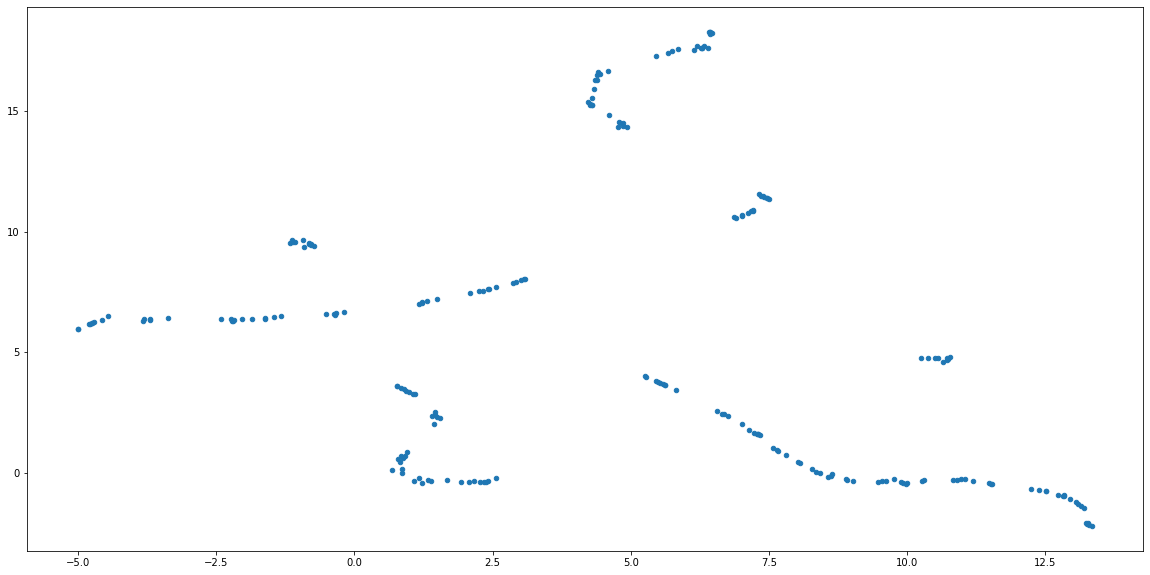

In [9]:
plt.figure(figsize = (20, 10))
plt.scatter(*embedding[0].T, s = 20, cmap = 'Spectral', alpha = 1.0)
plt.show()

In [10]:
for c in data.columns:
    pt = PowerTransformer(standardize=False)
    data_trans = pt.fit_transform(np.array(data[c]).reshape(-1,1)) 
    
kmeans = KMeans(n_clusters = 7).fit(data_trans)
kmeans_labels = kmeans.labels_


sse = {}
for k in tqdm(range(2, 25)):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_trans)
    sse[k] = kmeans.inertia_
    
fig = go.Figure(data = go.Scatter(x = list(sse.keys()), y = list(sse.values())))
fig.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:24<00:00,  1.04s/it]


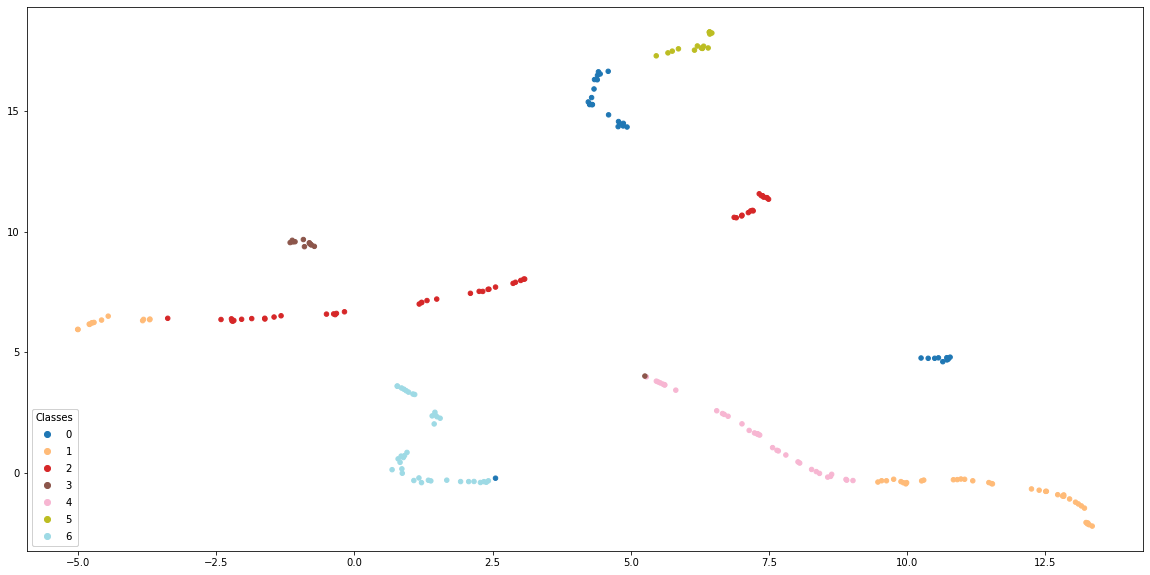

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[0][:, 0 ], embedding[0][:, 1], s=20, c = kmeans_labels,
                    cmap = 'tab20', alpha = 1.0,)

legend1 = ax.legend(*scatter.legend_elements(num = 6),
                   loc = 'lower left', title = 'Classes')
ax.add_artist(legend1)

In [12]:
data_index = pd.concat([data, index.iloc[:, 1:]], axis = 1)

In [13]:
data_index['kmeans_labels'] = kmeans_labels

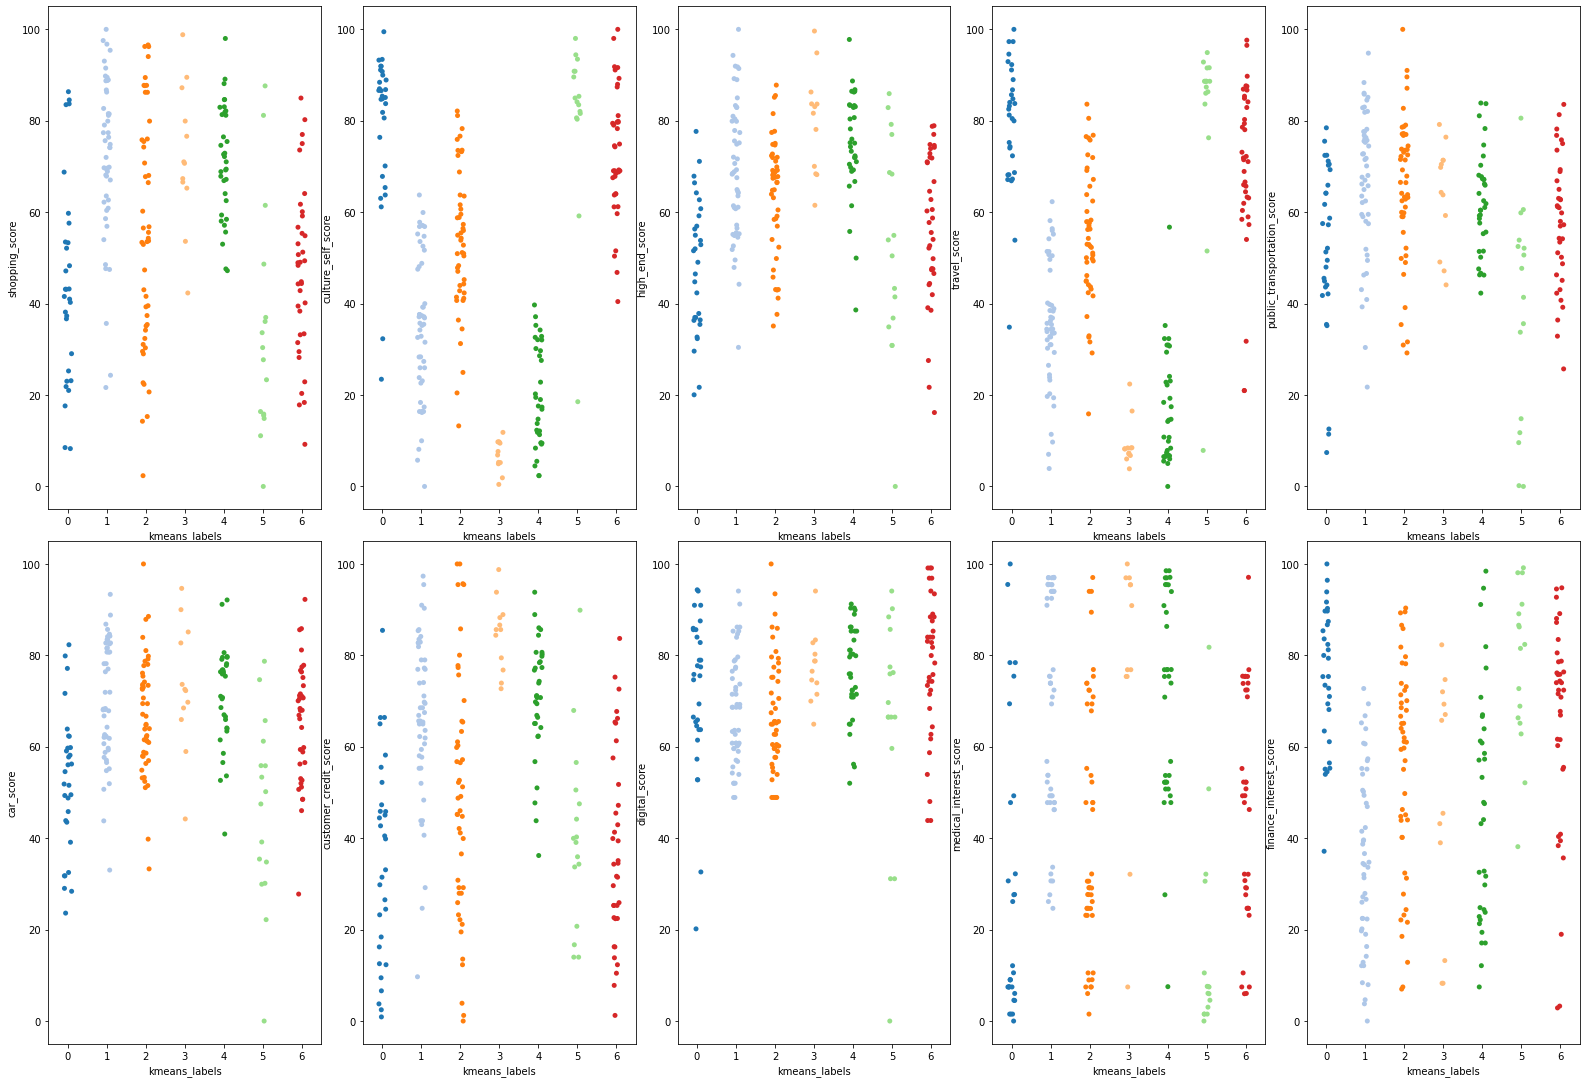

In [14]:
fig, ax = plt.subplots(2, 5, figsize = (22, 15))
fig.tight_layout()


for i, col in enumerate(index.iloc[:, 1:6].columns):
    sns.stripplot(x = 'kmeans_labels', y = col, data = data_index, jitter = True, ax = ax[0][i], palette = 'tab20')

for j, col in enumerate(index.iloc[:, 6:11].columns):
    sns.stripplot(x = 'kmeans_labels', y = col, data = data_index, jitter = True, ax = ax[1][j], palette = 'tab20')
    
plt.show()


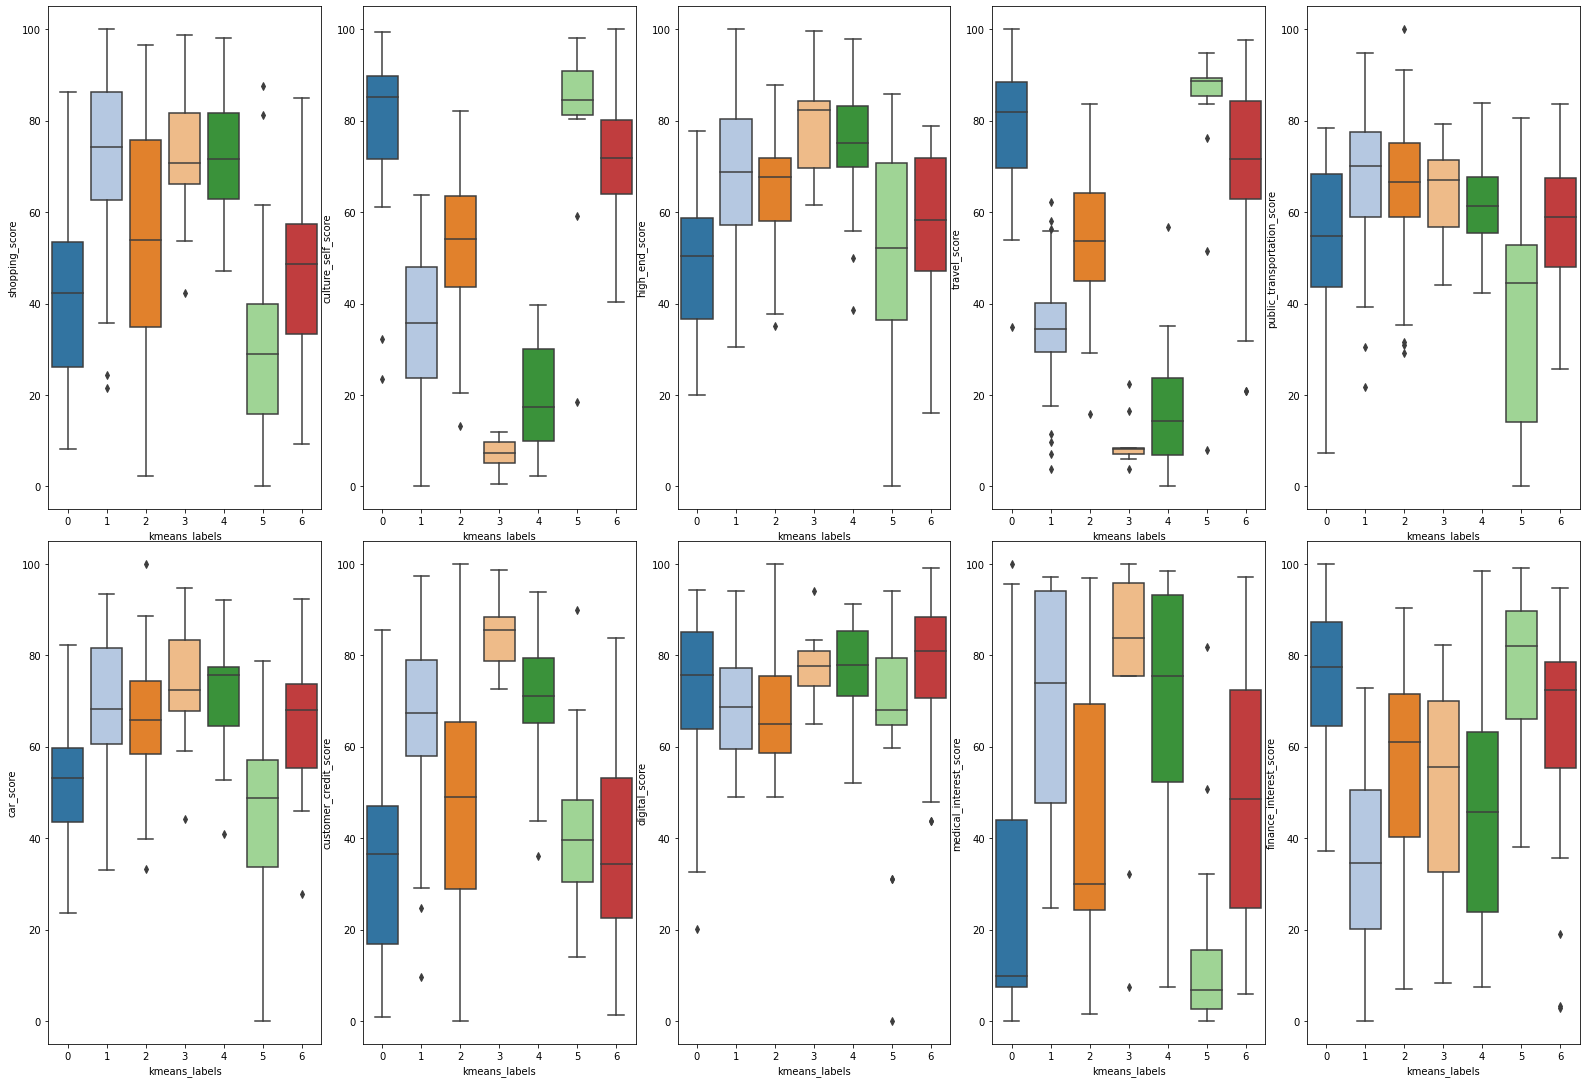

In [15]:
fig, ax = plt.subplots(2, 5, figsize = (22, 15))
fig.tight_layout()


for i, col in enumerate(index.iloc[:, 1:6].columns):
    sns.boxplot(x = 'kmeans_labels', y = col, data = data_index, ax = ax[0][i], palette = 'tab20')

for j, col in enumerate(index.iloc[:, 6:11].columns):
    sns.boxplot(x = 'kmeans_labels', y = col, data = data_index, ax = ax[1][j], palette = 'tab20')
    
plt.show()


0번 클러스터
- 관심도 높음: 자차, 하이엔드, 대중교통 
    
- 관심도 낮음: 의료

자차와 하이엔드 대중교통에 대한 소비 및 관심도가 높은 지역. 탄소관련 마케팅을 제안하면 좋을것


1번 클러스터
- 관심도 높음: 쇼핑, 하이엔드, 자차, 의료
    
- 관심도 낮음: 재테크, 여행, 문화/자기소비 

자차 , 쇼핑, 하이엔드, 의료 에 관심이 높은 지역으로 자동차에 대한 관심과 의료를 합쳐 전기차 보험관련 마케팅 제안


2번 클러스터
- 관심도 높음: 문화/자기소비, 여행, 재테크, 디지털 제일 높음
    
- 관심도 낮음: 신용소비

문화/자기소비, 여행이 높은 지역이고 디지털에 대한 관심도가 가장 높은 지역 여행관련하여 인터넷이나 앱을 적극 활용하여 마케팅 제안
    
    
3번 클러스터
- 관심도 높음: 문화 자기소비 가장 높음, 여행 , 재테크

- 관심도 낮음: 의료, 신용소비

- 전반적으로 2번 클러스터와 비슷
2번 클러스터와 전반적으로 비슷하나 의료 중심의 esg마케팅은 별로 효과가 크지 않을 것으로 예상


4번 클러스터
- 관심도 높음: 쇼핑, 하이엔드, 대중교통, 의료, 자차 ,신용소비   --> 전반적으로 높음

- 관심도 낮음: 여행, 문화 자기소비, 재테크

여행 문화/자기소비 재테크 외에 전반적인 지표가 높은 클러스터 2/3번 클러스터와는 다른 마케팅 전략을 취해야 하는 것으로 예상



5번 클러스터
- 관심도 높음: 쇼핑, 하이엔드, 대중교통, 자차, 신용소비 제일 높음, 의료도 제일 높음

- 관심도 낮음: 문화 자기소비 제일 낮음, 여행 제일 낮음
관심도가 가장 극단적으로 나뉘는 클러스터, 신용소비가 제일 높고 의료도 제일 높은 것으로 보아 금융관련 업무나 보험 업무에 대한 esg 마케팅이 적합할 것으로 예상



6번 클러스터링:
- 관심도 높음: 문화 자기소비, 여행 가장 높음, 재테크 가장 높음

- 관심도 낮음: 쇼핑 가장 낮음, 대중교통 가장 낮음, 의료 가장낮음

재테크와 여행이 가장 높고 문화 자기소비도 상위권에 위치 2/3번 클러스터와 비슷한 esg마케팅을 추천하나
쇼핑이나 대중교통 의료 등에 대한 esg 마케팅의 효과는 미미할 것으로 예상

In [16]:
eda_data = index.iloc[:, 1:]
eda_data['kmeans_labels'] = kmeans_labels

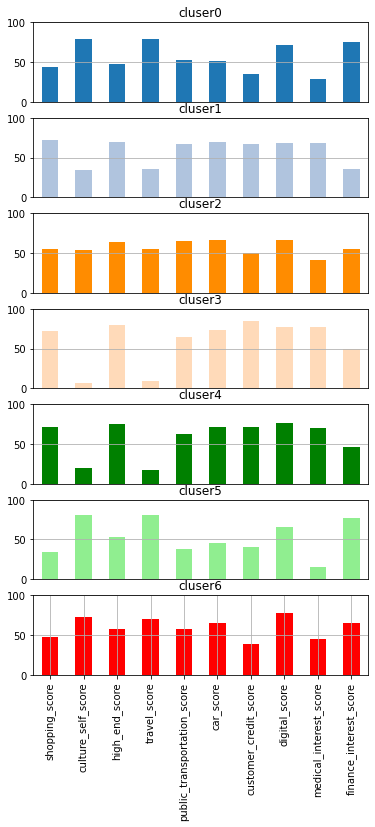

In [17]:
fig, axes = plt.subplots(7, 1, figsize = (6, 12))

eda_data[eda_data['kmeans_labels'] == 0].iloc[:, :-1].mean().plot.bar(ax = axes[0])
eda_data[eda_data['kmeans_labels'] == 1].iloc[:, :-1].mean().plot.bar(ax = axes[1], color = 'lightsteelblue')
eda_data[eda_data['kmeans_labels'] == 2].iloc[:, :-1].mean().plot.bar(ax = axes[2], color = 'darkorange')
eda_data[eda_data['kmeans_labels'] == 3].iloc[:, :-1].mean().plot.bar(ax = axes[3], color = 'peachpuff')
eda_data[eda_data['kmeans_labels'] == 4].iloc[:, :-1].mean().plot.bar(ax = axes[4], color = 'green')
eda_data[eda_data['kmeans_labels'] == 5].iloc[:, :-1].mean().plot.bar(ax = axes[5], color = 'lightgreen')
eda_data[eda_data['kmeans_labels'] == 6].iloc[:, :-1].mean().plot.bar(ax = axes[6], color = 'red')


axes[0].grid()
axes[0].set_ylim(0 ,100)
axes[0].xaxis.set_visible(False)
axes[0].set_title('cluser0')
axes[1].grid()
axes[1].set_ylim(0 ,100)
axes[1].xaxis.set_visible(False)
axes[1].set_title('cluser1')
axes[2].grid()
axes[2].set_ylim(0 ,100)
axes[2].xaxis.set_visible(False)
axes[2].set_title('cluser2')
axes[3].grid()
axes[3].set_ylim(0 ,100)
axes[3].xaxis.set_visible(False)
axes[3].set_title('cluser3')
axes[4].grid()
axes[4].set_ylim(0 ,100)
axes[4].xaxis.set_visible(False)
axes[4].set_title('cluser4')
axes[5].grid()
axes[5].set_ylim(0 ,100)
axes[5].xaxis.set_visible(False)
axes[5].set_title('cluser5')
axes[6].grid()
axes[6].set_ylim(0 ,100)
axes[6].set_title('cluser6')


plt.show()

In [18]:
index = pd.concat([index, data_index['kmeans_labels']], axis = 1)

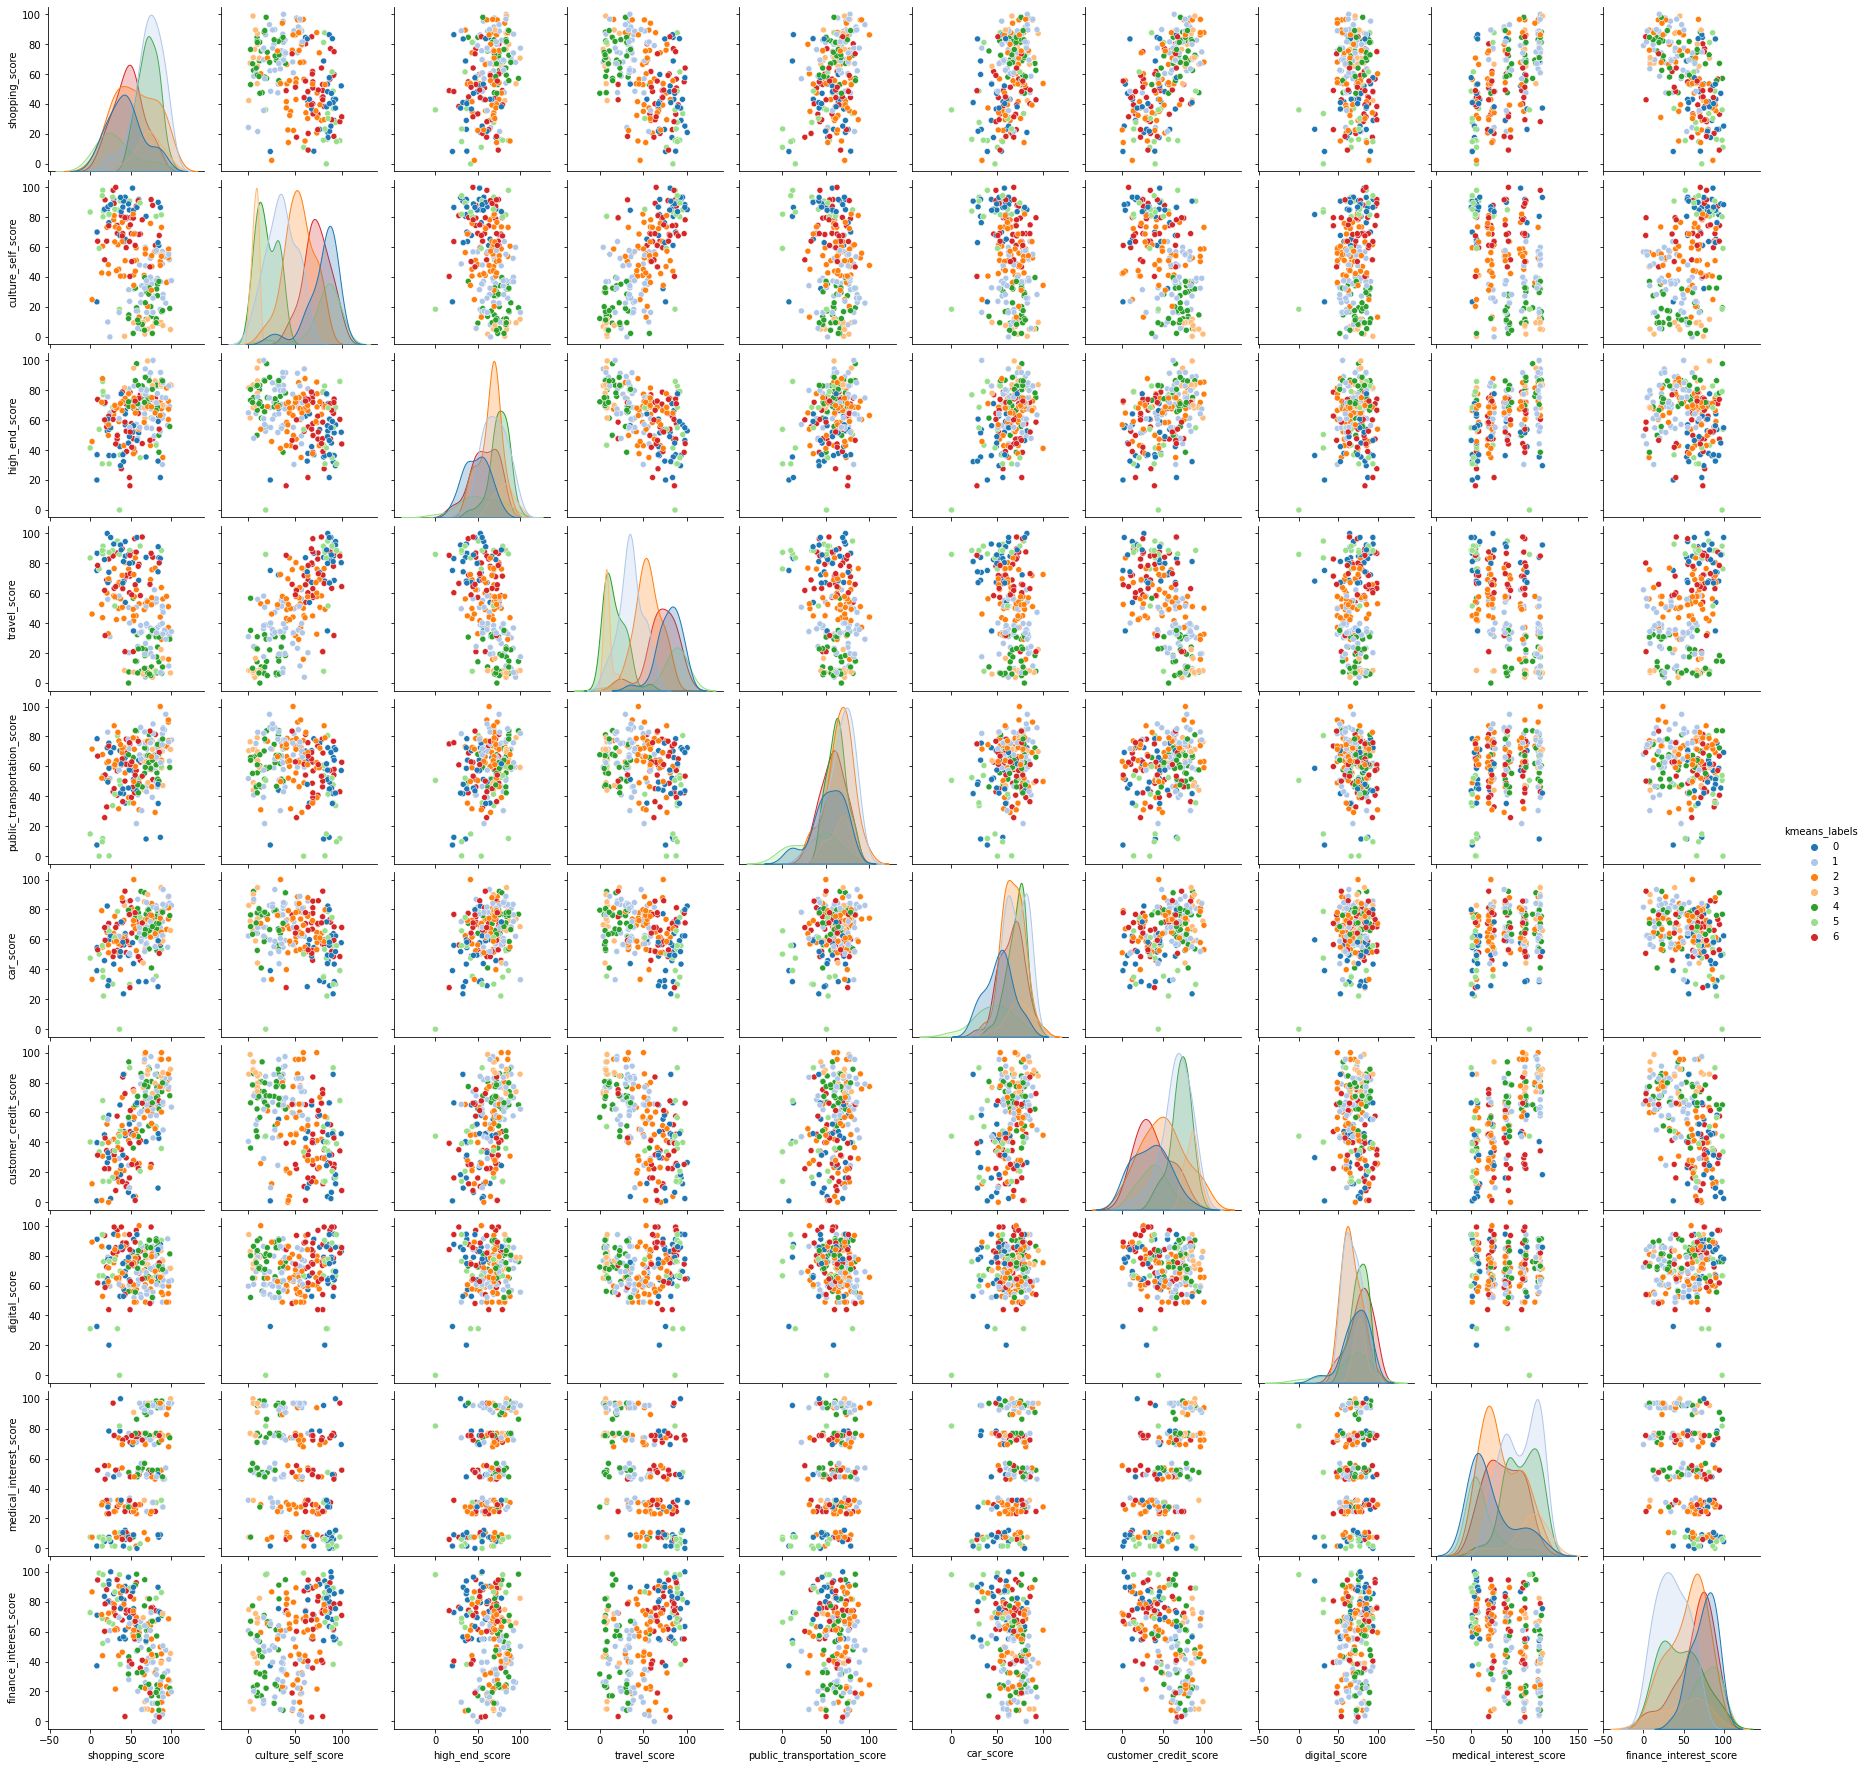

In [19]:
sns.pairplot(data = index,
            hue = 'kmeans_labels',
            plot_kws = {'alpha' : 1},
            palette = 'tab20')

plt.show()

In [20]:
index['kmeans_label'] = kmeans_labels

In [21]:
index.to_csv('../Data/index_df_mm_ratio_label.csv',index=False)

# Appendix (실험용)

### Hierachical

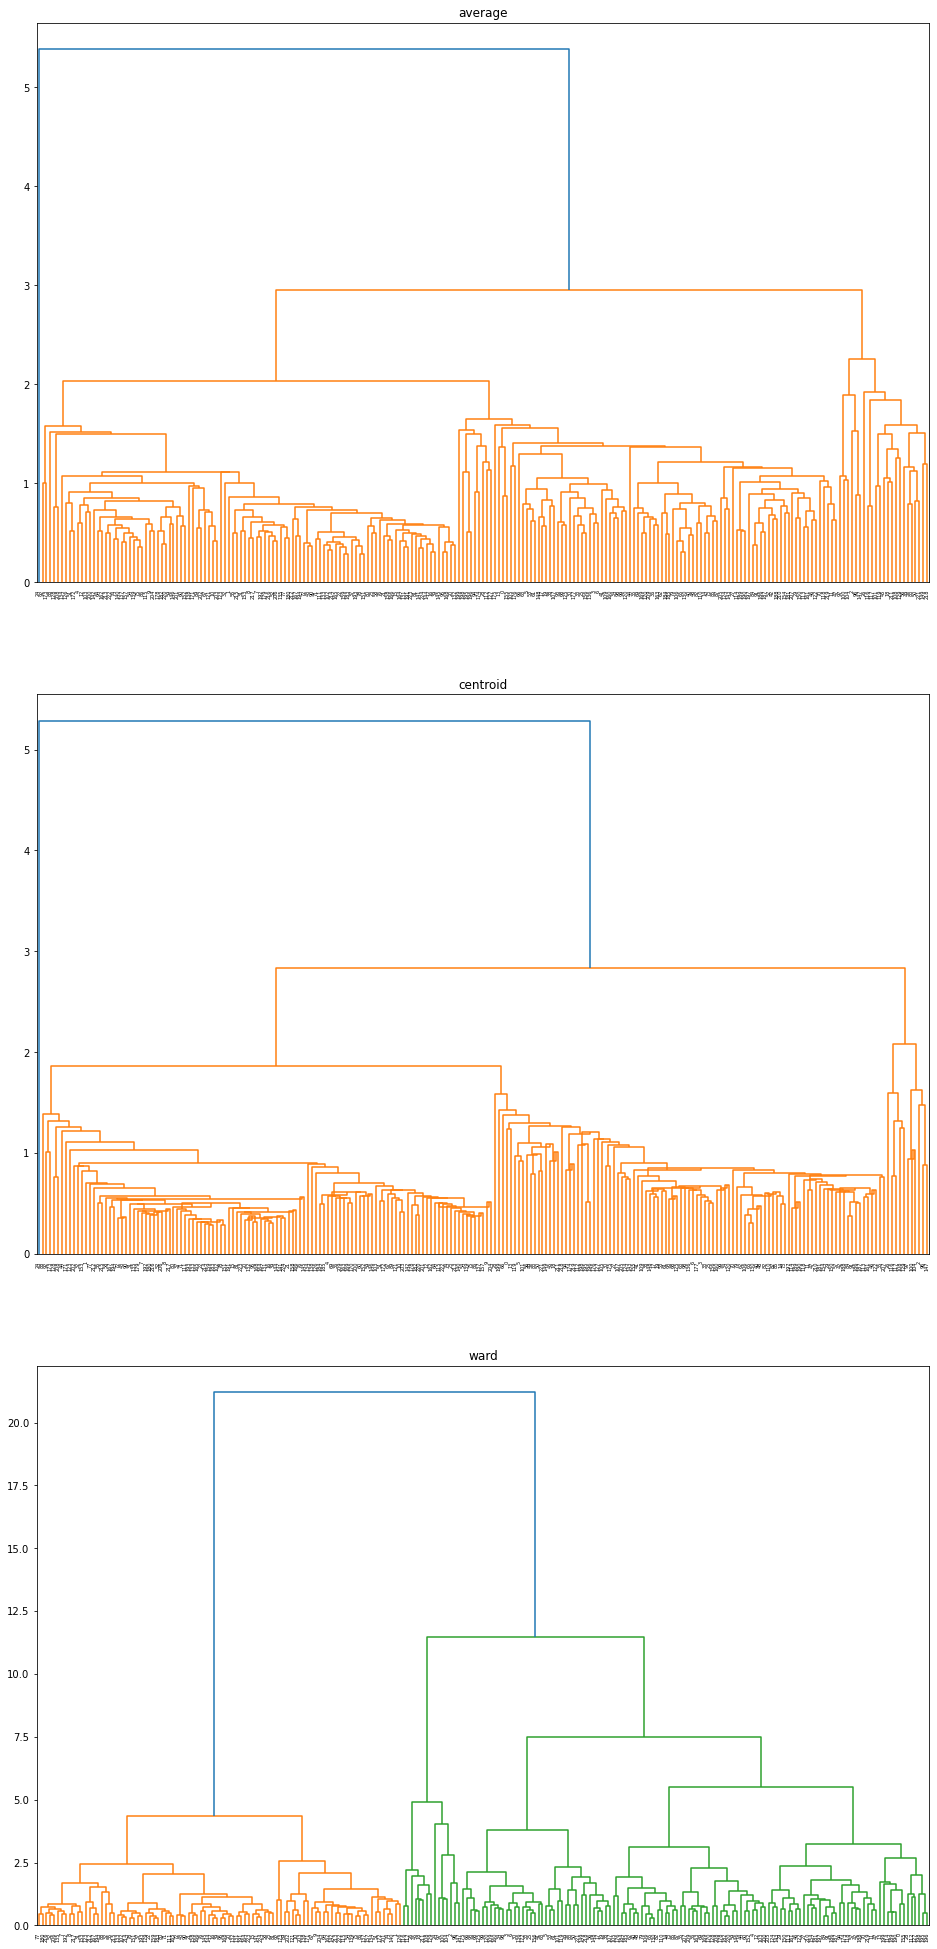

In [22]:
linkage_list = ['average', 'centroid', 'ward']


fig, axes = plt.subplots(nrows = len(linkage_list), ncols = 1, figsize = (16, 35))

for i in range(len(linkage_list)):
    hierarchical = linkage(data_scaledmin, method = linkage_list[i])
    dn = dendrogram(hierarchical, ax = axes[i])
    axes[i].title.set_text(linkage_list[i])
    
plt.show()

#### 실루엣 계수 시각화

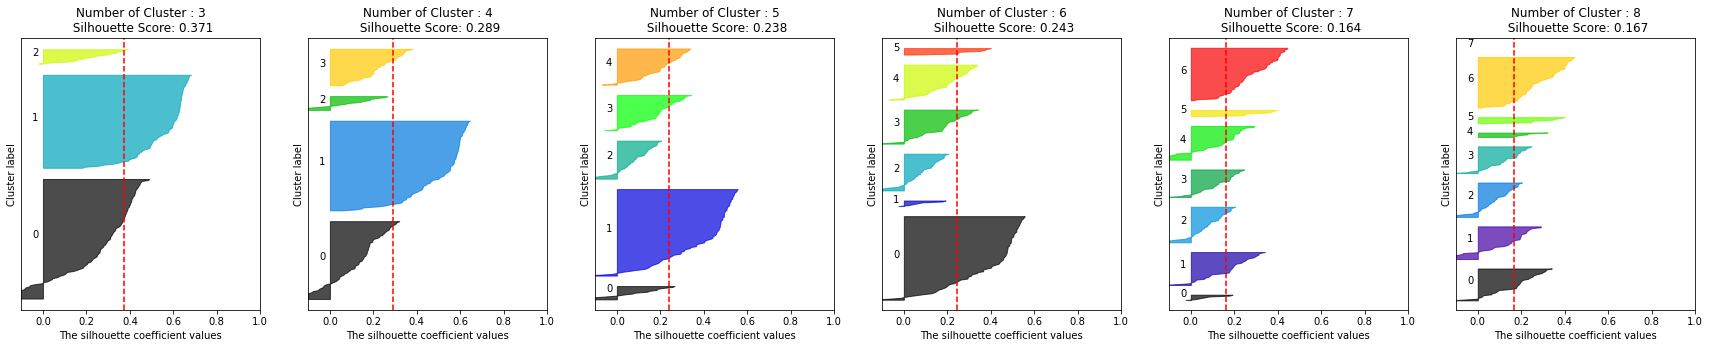

In [23]:
cluster_lists = [3,4,5,6,7,8]

n_cols = len(cluster_lists)
fig, axs = plt.subplots(nrows = 1, ncols =  n_cols, figsize = (5 * n_cols, 5))


for ind, n_cluster in enumerate (cluster_lists):
    model = AgglomerativeClustering(n_clusters = n_cluster, linkage = 'ward')
    
    cluster_labels = model.fit_predict(data_scaledmin)

    sil_avg = silhouette_score(data_scaledmin, cluster_labels)
    sil_values = silhouette_samples(data_scaledmin, cluster_labels)
    
    y_lower = 10
        
    axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n Silhouette Score: ' + str(round(sil_avg, 3)))
    axs[ind].set_xlabel("The silhouette coefficient values")
    axs[ind].set_ylabel("Cluster label")
    axs[ind].set_xlim([-0.1, 1])
    axs[ind].set_ylim([-1, len(data_scaledmin) + (n_cluster + 1) * 10])
    axs[ind].set_yticks([])
    axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    
    for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper) , 0, ith_cluster_sil_values,
                                  facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
    axs[ind].axvline(x = sil_avg, color = 'red', linestyle = "--")

### K-means

In [24]:
def change_n_cluster(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1, figsize = (12, 6))
    plt.plot(n_clusters, sum_of_squared_distance, 'o')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Interia')

In [25]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12 ,13, 14, 15]

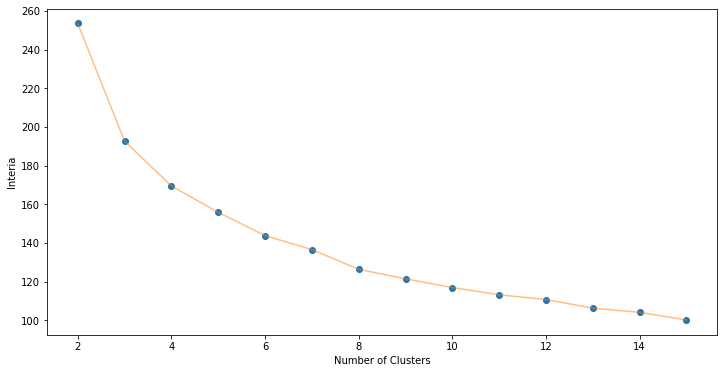

In [26]:
change_n_cluster(n_clusters, data_scaledmin)

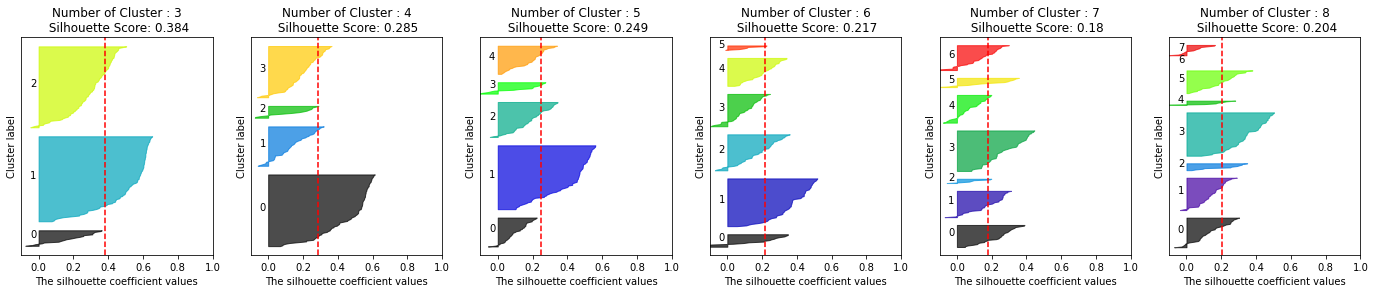

In [27]:
cluster_lists = [3, 4, 5, 6, 7, 8]

n_cols = len(cluster_lists)
fig, axs = plt.subplots(nrows = 1, ncols =  n_cols, figsize = (4 * n_cols, 4))


for ind, n_cluster in enumerate (cluster_lists):
    model = KMeans(n_clusters = n_cluster, init = 'k-means++')
    
    cluster_labels = model.fit_predict(data_scaledmin)

    sil_avg = silhouette_score(data_scaledmin, cluster_labels)
    sil_values = silhouette_samples(data_scaledmin, cluster_labels)
    
    y_lower = 10
        
    axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n Silhouette Score: ' + str(round(sil_avg, 3)))
    axs[ind].set_xlabel("The silhouette coefficient values")
    axs[ind].set_ylabel("Cluster label")
    axs[ind].set_xlim([-0.1, 1])
    axs[ind].set_ylim([-1, len(data_scaledmin) + (n_cluster + 1) * 10])
    axs[ind].set_yticks([])
    axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    
    for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper) , 0, ith_cluster_sil_values,
                                  facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
    axs[ind].axvline(x = sil_avg, color = 'red', linestyle = "--")

### DBSCAN

1.1696281958492338


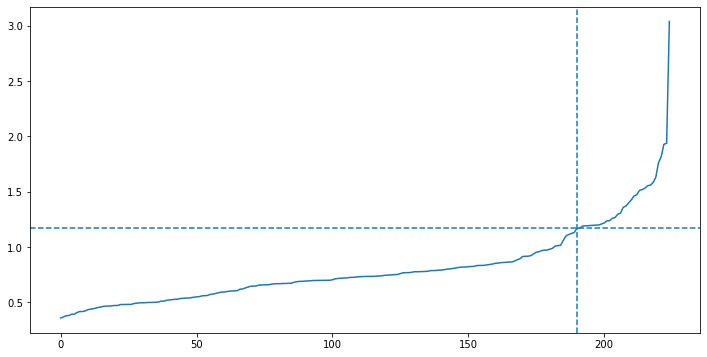

In [28]:
neigh  = NearestNeighbors(n_neighbors = 7)
neigh.fit(data_scaledmin)
distances, indices = neigh.kneighbors(data_scaledmin)

plt.figure(figsize = (12, 6))
plt.plot(np.sort(distances[:, 6]))

plt.axhline(1.169, 0, 200, ls = '--')
plt.axvline(190, 0, 2, ls = '--')

print(np.sort(distances[:, 6])[190])

In [29]:
dbscan = DBSCAN(eps = 1.169, min_samples = 6)
dbscan.fit(data_scaledmin)

print('실루엣 계수: ', silhouette_score(data_scaledmin, dbscan.labels_))
print(silhouette_score(data_scaledmin[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))

실루엣 계수:  0.4344747486162598


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

- DBSAN 자체가 잘못된 군집을 형성해서 오류가 남